# Data-analytiikan osaaja

## Koulutus: 13.2.2020-14.2.2020

# Aihe: päätöspuualgoritmit

Nyt tutustumme päätöspuihin (engl. decision trees) ja satunnaismetsiin (random forests). Päätöspuussa päätökset tehdään vaiheittan siten, että puussa siirrytään puun solmuissa ("risteyksissä") jompaan kumpaan suuntaan datan ominaisuuksien perusteella. Kun lopulta päästään puun silmuun, josta ei enää päästä eteenpäin, annetaan datalle silmun mukainen luokka.

In [1]:
# Tuo peruskirjastojen funktionaalisuutta:
import numpy as np
import pandas as pd

# scikit-learn -kirjastosta päätöspuualgoritmi
from sklearn import tree

# scikit-learn -kirjastosta validointia varten 
from sklearn.model_selection import train_test_split

# scikit-learn -kirjastosta mallin arviointia varten
from sklearn import metrics

Voit aina katsoa toiminallisuutta scikit-learn-kirjaston kotisivulta: https://scikit-learn.org/stable/

In [3]:
data = pd.read_csv('titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(data['Sex'].unique()))

LabelEncoder()

In [17]:
data['Sex_categorical'] = le.transform(data['Sex'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
...     data.drop(['Survived', 'Name', 'Sex'], axis=1), data['Survived'], test_size=0.33, random_state=42)

In [22]:
puu = tree.DecisionTreeClassifier()

In [23]:
puu = puu.fit(x_train, y_train)

In [25]:
ennustus_train = puu.predict(x_train)
ennustus_test = puu.predict(x_test)

virhe_train = metrics.accuracy_score(y_train, ennustus_train)
virhe_test = metrics.accuracy_score(y_test, ennustus_test)

print("Tarkkuus (opetus): {0}".format(virhe_train))
print("Tarkkuus (testaus): {0}".format(virhe_test))

Tarkkuus (opetus): 0.9848484848484849
Tarkkuus (testaus): 0.7713310580204779


[Text(2216.1179577464786, 5254.8, 'Sex_categorical <= 0.5\ngini = 0.471\nsamples = 293\nvalue = [182, 111]\nclass = Survived'),
 Text(864.507042253521, 4892.4, 'Pclass <= 2.5\ngini = 0.415\nsamples = 92\nvalue = [27, 65]\nclass = Died'),
 Text(419.15492957746477, 4530.0, 'Age <= 27.5\ngini = 0.085\nsamples = 45\nvalue = [2, 43]\nclass = Died'),
 Text(314.36619718309856, 4167.6, 'Age <= 26.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]\nclass = Died'),
 Text(209.57746478873239, 3805.2, 'Siblings/Spouses Aboard <= 0.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = Died'),
 Text(104.78873239436619, 3442.8, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Died'),
 Text(314.36619718309856, 3442.8, 'Fare <= 68.95\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Died'),
 Text(209.57746478873239, 3080.4, 'Parents/Children Aboard <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(104.78873239436619, 2718.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = D

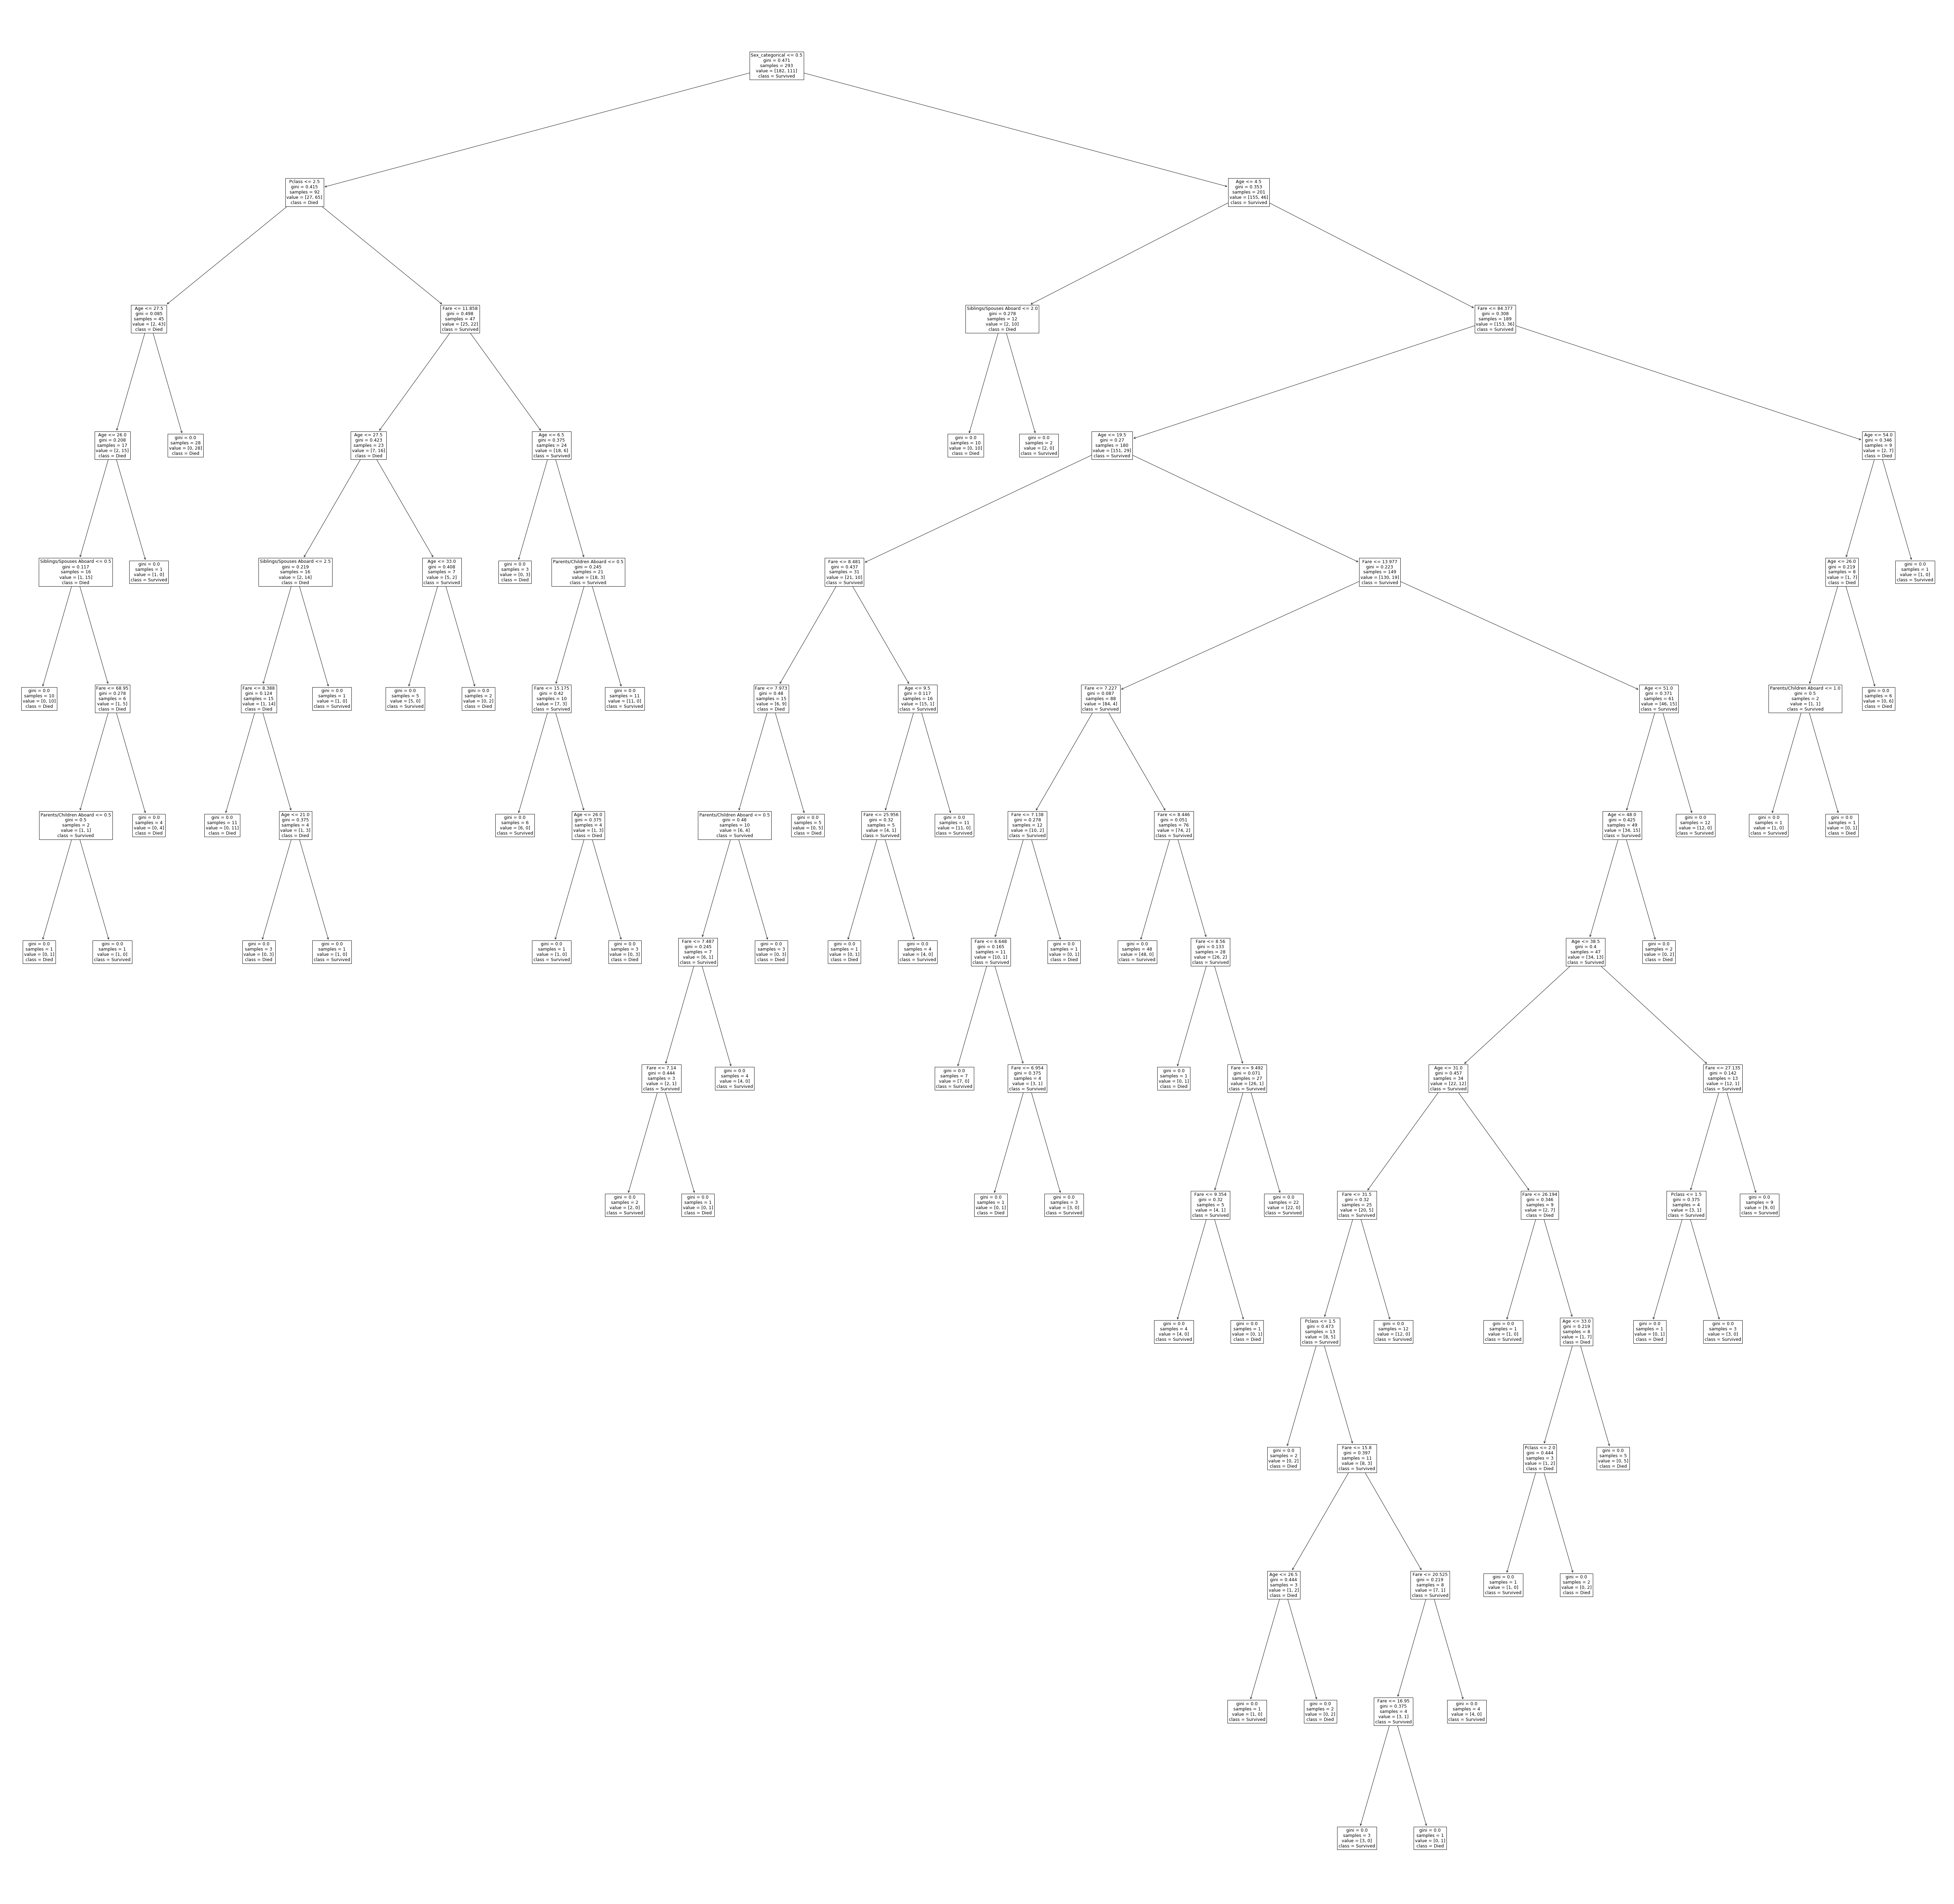

In [40]:
# Puun rakenne voidaan esittää visuaalisesti, tutki scikit-learn kirjaston funktiota "plot_tree"

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 100,100

tree.plot_tree(puu.fit(x_test, ennustus_test),
               feature_names=data.drop(['Survived', 'Name', 'Sex'], axis=1).columns,
               class_names=['Died', 'Survived'])
# tree.export_graphviz(puu, class_names=['0', '1'])